In [136]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, classification_report,accuracy_score, confusion_matrix




Data Analysis

In [2]:
df = pd.read_csv("/content/winequality-red.csv")

In [5]:
df.head().transpose()

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [31]:
df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  good_quality
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6        0               4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7        1               4
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6        0               4
7.2            0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5        0               4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5        0               3
                                                                                                                                                                               ..
7.5            0.420             0.32         2.7             0.067      7.0                  25.0                  0.99628  3.24  0.44       10.4     5        0               1
                                 0.31         1.6             0.080      15.0                 42.0                  0.99780  3.31  0.64       9.0      5        0               1
               0.410             0.15         3.7             0.104      29.0                 94.0                  0.99786  3.14  0.58       9.1      5        0               1
               0.400             0.18         1.6             0.079      24.0                 58.0                  0.99650  3.34  0.58       9.4      5        0               1
               0.520             0.40         2.2             0.060      12.0                 20.0                  0.99474  3.26  0.64       11.8     6        0               1
Name: count, Length: 1359, dtype: int64

In [9]:
df.shape

(1599, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


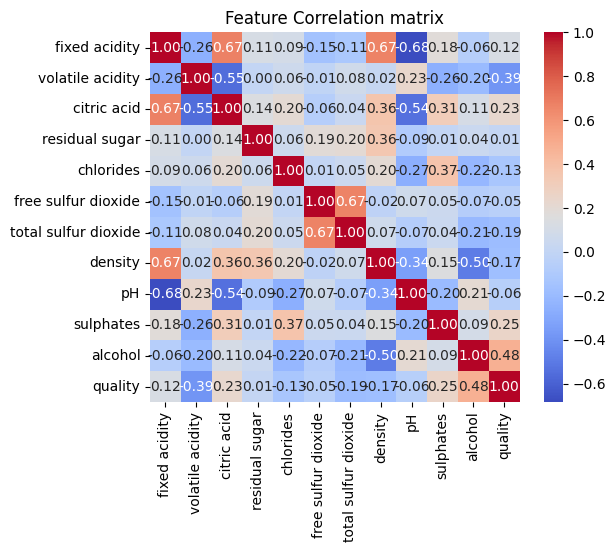

In [15]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', square = True)
plt.title('Feature Correlation matrix')
plt.show()

The key feature most strongly associated with wine quality is **alcohol**, with a positive correlation of +0.476, meaning higher alcohol content typically leads to better quality. **Sulphates** and **citric acid** also have moderate positive effects. On the other hand, **volatile acidity** has the strongest negative correlation (−0.391), indicating that higher acidity reduces quality. Other negatively correlated features include **density**, **total sulfur dioxide**, and **chlorides**, suggesting that higher sugar, sulfur, or salt content can lower quality. **pH** and **free sulfur dioxide** show weak negative correlations, while **residual sugar** and **fixed acidity** have minimal positive effects on quality.

<Axes: xlabel='alcohol', ylabel='quality'>

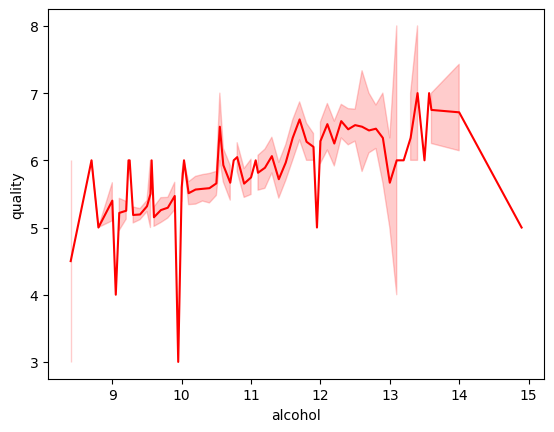

In [20]:
sns.lineplot(data=df,x=df["alcohol"],y=df["quality"],color='red')

In [24]:
df["quality"].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [25]:
df["good_quality"] = [1 if x >= 7 else 0 for x in df["quality"]]

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<Axes: ylabel='quality'>

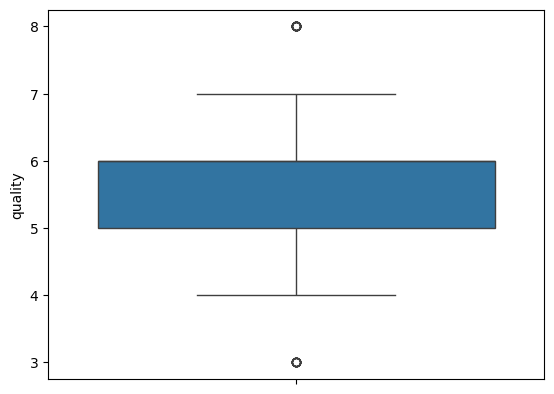

In [28]:
sns.boxplot(df["quality"])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'good_quality'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

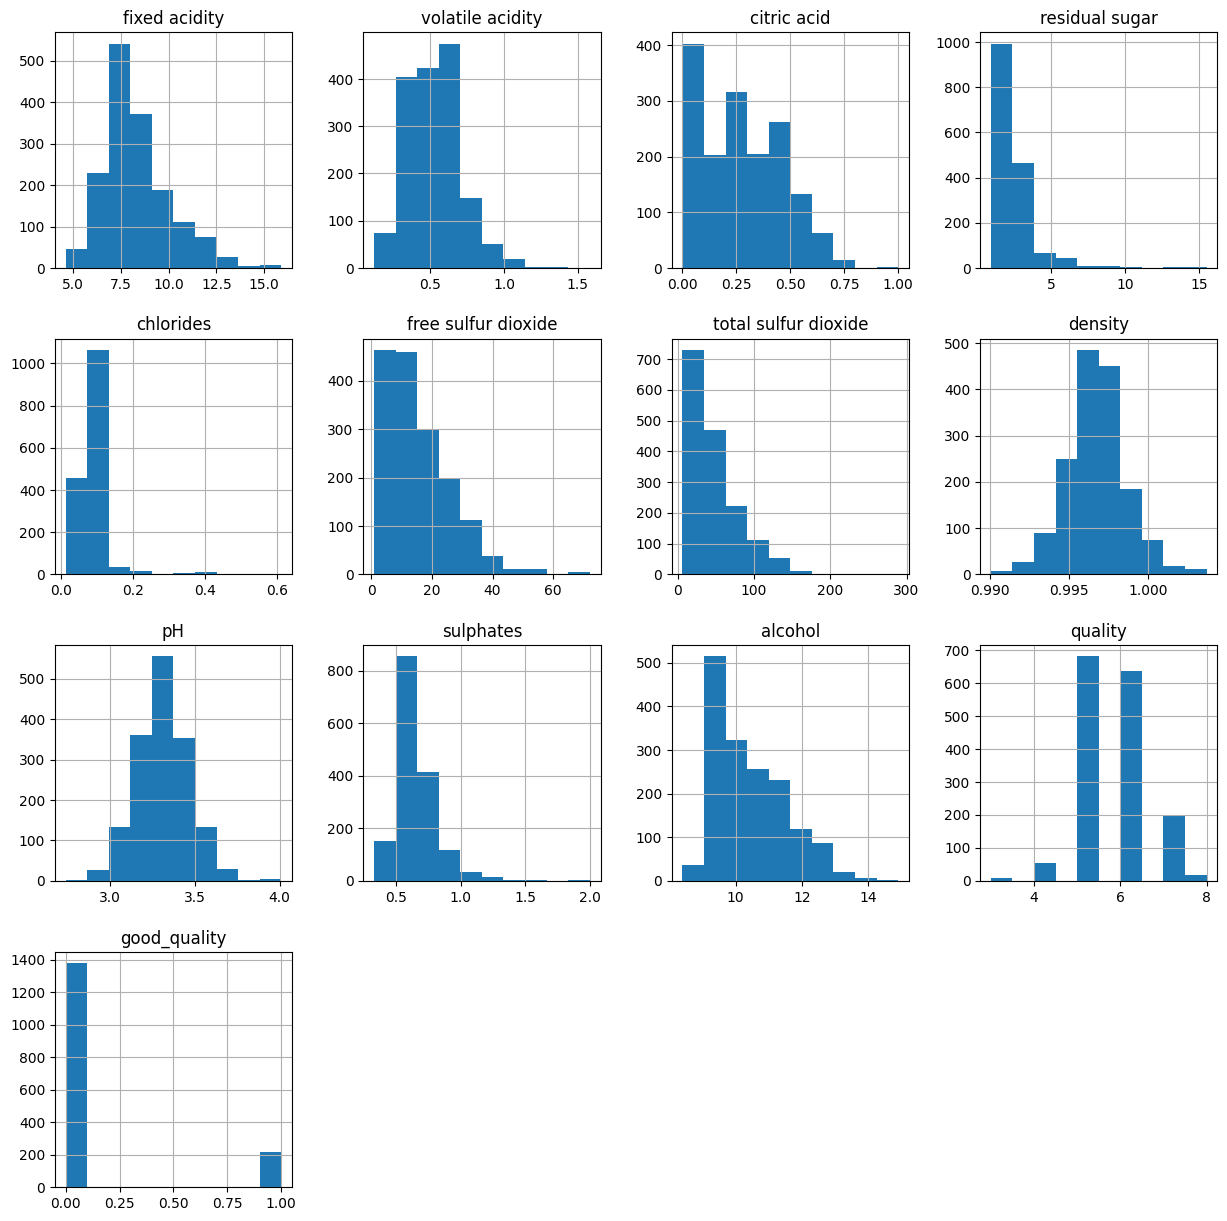

In [30]:
df.hist(figsize=(15,15))

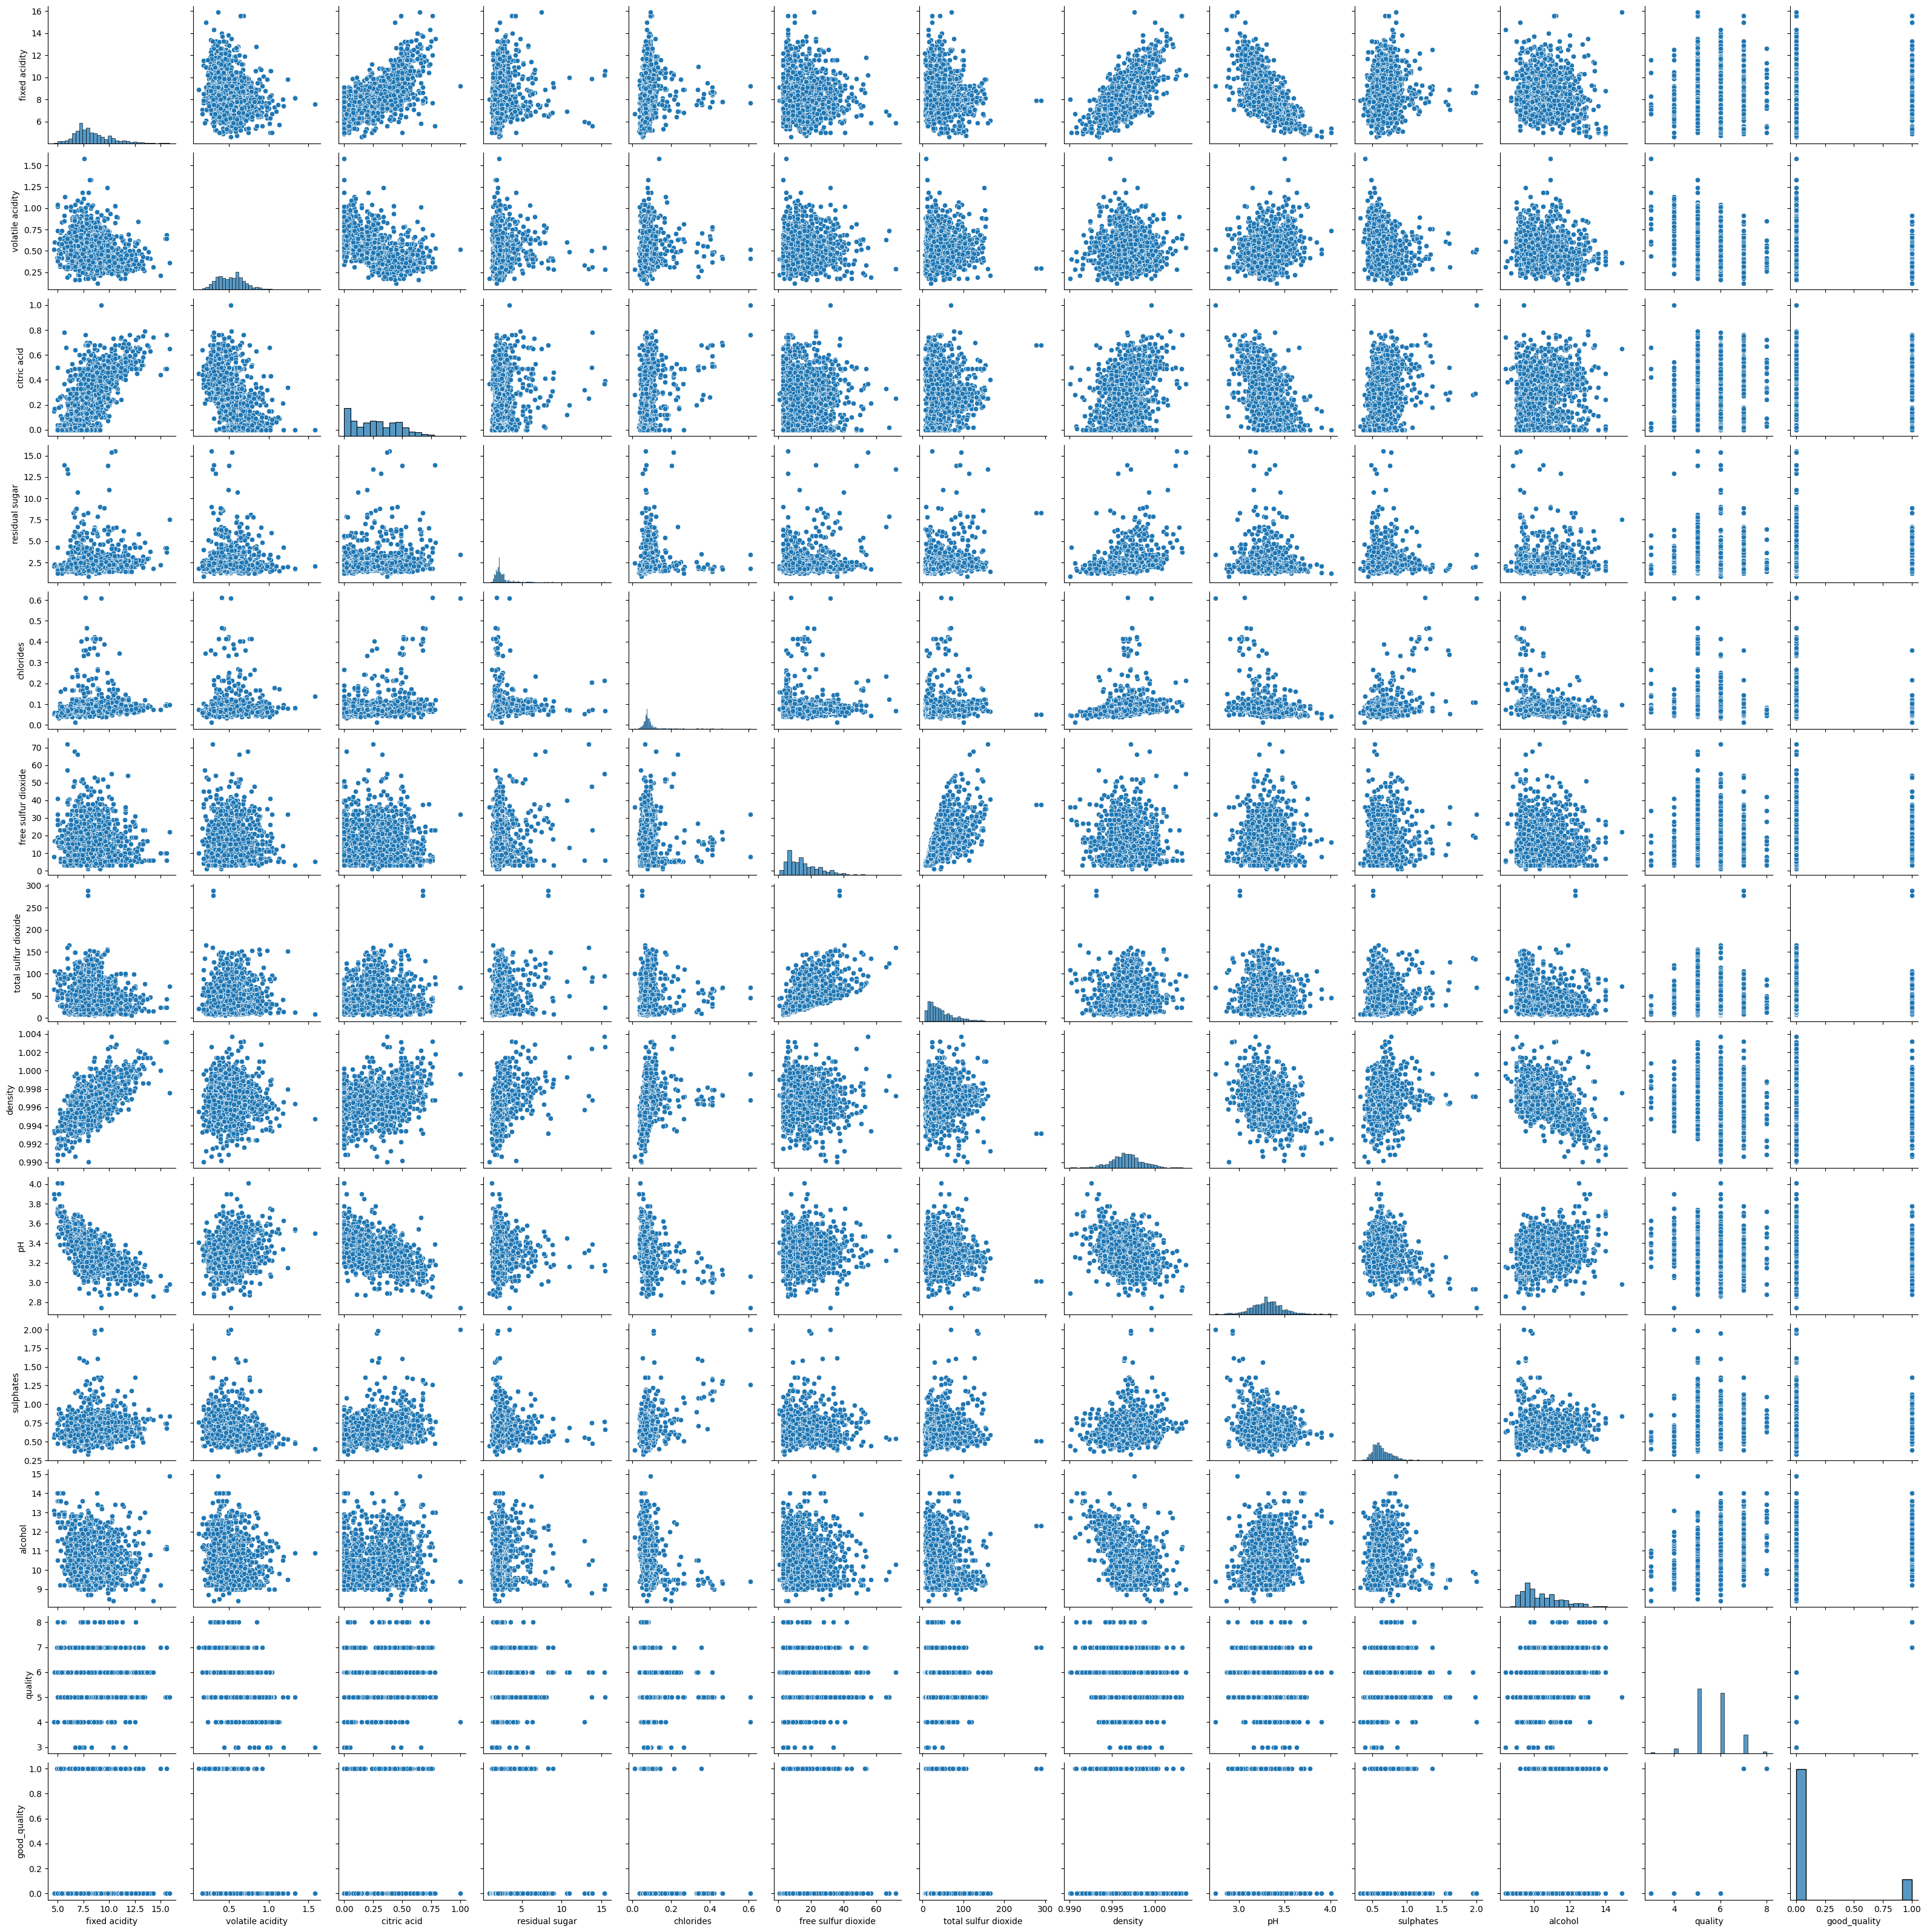

In [32]:
sns.pairplot(df)

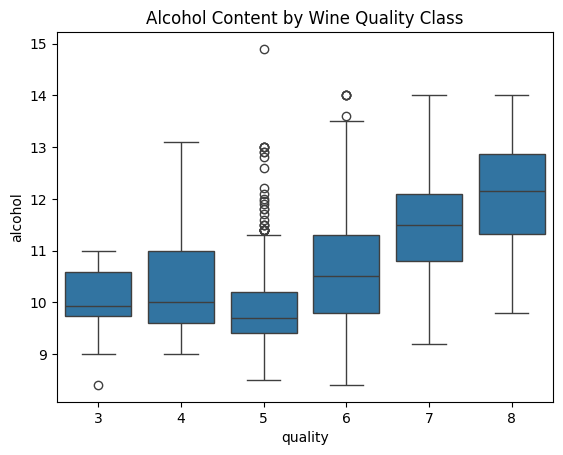

In [36]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol Content by Wine Quality Class")


plt.show()

<Axes: xlabel='alcohol', ylabel='Count'>

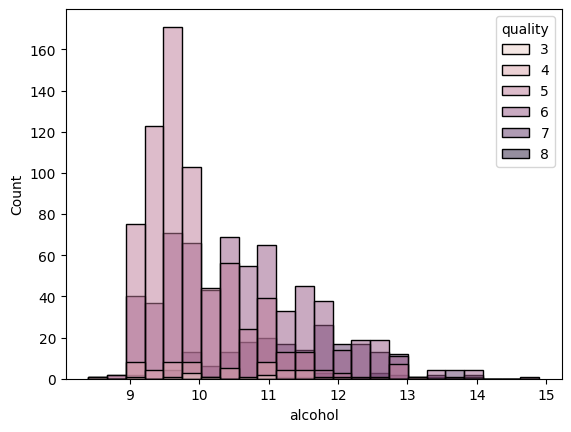

In [40]:
sns.histplot(data=df,x='alcohol',hue='quality',color="blue")

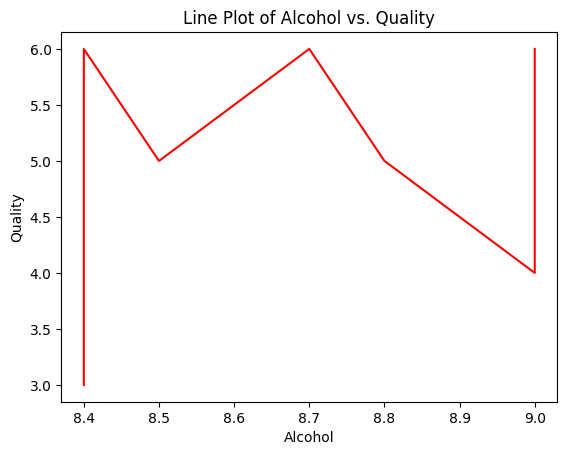

In [45]:
df_sorted = df.sort_values('alcohol')

plt.plot(df_sorted['alcohol'].head(10), df_sorted['quality'].head(10), color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Line Plot of Alcohol vs. Quality')
plt.show()

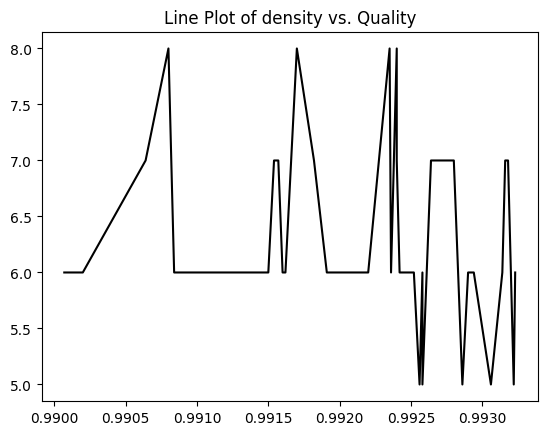

In [57]:
df_sorted = df.sort_values('density')

plt.plot(df_sorted['density'].head(50), df_sorted['quality'].head(50), color='black')
plt.title('Line Plot of density vs. Quality')
plt.show()

In [58]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<Axes: xlabel='quality', ylabel='alcohol'>

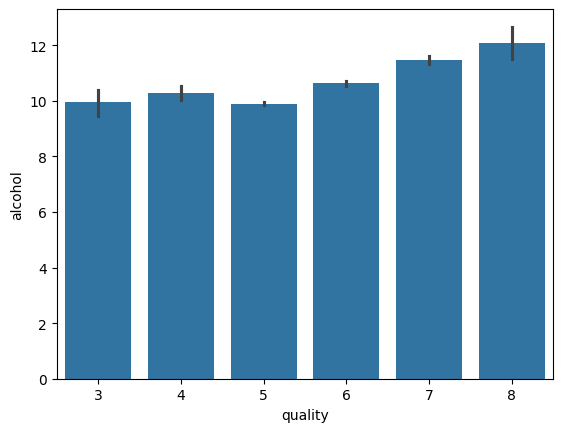

In [59]:
sns.barplot(x='quality',y='alcohol',data=df)


<Axes: xlabel='pH', ylabel='quality'>

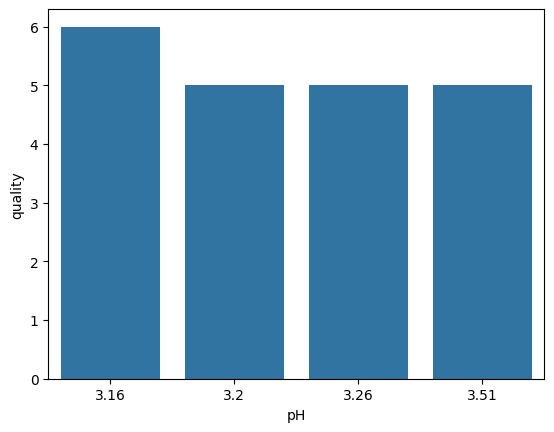

In [65]:
sns.barplot(x=df["pH"].head(),y=df["quality"].head())

In [91]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Train and Test data spliting

In [92]:
df["good_quality"].value_counts()

,count
good_quality,
0,1382
1,217


In [93]:
x = df.drop(['quality','good_quality'],axis=1)
y = df['good_quality']

In [100]:
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size=0.20)

Model fitting

In [141]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
}


Model evaluation


In [142]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       282
           1       0.37      0.37      0.37        38

    accuracy                           0.85       320
   macro avg       0.64      0.64      0.64       320
weighted avg       0.85      0.85      0.85       320

Confusion Matrix:
 [[258  24]
 [ 24  14]]
Random Forest Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       282
           1       0.81      0.34      0.48        38

    accuracy                           0.91       320
   macro avg       0.87      0.67      0.72       320
weighted avg       0.91      0.91      0.90       320

Confusion Matrix:
 [[279   3]
 [ 25  13]]
XGBoost Accuracy: 0.909375
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [144]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [145]:
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       282
           1       0.45      0.26      0.33        38

    accuracy                           0.88       320
   macro avg       0.68      0.61      0.63       320
weighted avg       0.85      0.88      0.86       320

Confusion Matrix:
 [[270  12]
 [ 28  10]]
AUC Score: 0.8825121313923106


Summary of all

In [149]:

data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost", "Another Model"],
    "Accuracy": [0.85, 0.9125, 0.909375, 0.88],
    "Precision (Class 0)": [0.91, 0.92, 0.93, 0.91],
    "Recall (Class 0)": [0.91, 0.99, 0.98, 0.96],
    "F1-Score (Class 0)": [0.91, 0.95, 0.95, 0.93],
    "Precision (Class 1)": [0.37, 0.81, 0.70, 0.45],
    "Recall (Class 1)": [0.37, 0.34, 0.42, 0.26],
    "F1-Score (Class 1)": [0.37, 0.48, 0.52, 0.33],
    "Macro Avg Precision": [0.64, 0.87, 0.81, 0.68],
    "Macro Avg Recall": [0.64, 0.67, 0.70, 0.61],
    "Macro Avg F1-Score": [0.64, 0.72, 0.74, 0.63],
    "Weighted Avg Precision": [0.85, 0.91, 0.90, 0.85],
    "Weighted Avg Recall": [0.85, 0.91, 0.91, 0.88],
    "Weighted Avg F1-Score": [0.85, 0.90, 0.90, 0.86]
}


result_df = pd.DataFrame(data)


print(result_df)


result_df.to_csv('model_comparison_results.csv', index=True)


           Model  Accuracy  Precision (Class 0)  Recall (Class 0)  \
0  Decision Tree  0.850000                 0.91              0.91   
1  Random Forest  0.912500                 0.92              0.99   
2        XGBoost  0.909375                 0.93              0.98   
3  Another Model  0.880000                 0.91              0.96   

   F1-Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0                0.91                 0.37              0.37   
1                0.95                 0.81              0.34   
2                0.95                 0.70              0.42   
3                0.93                 0.45              0.26   

   F1-Score (Class 1)  Macro Avg Precision  Macro Avg Recall  \
0                0.37                 0.64              0.64   
1                0.48                 0.87              0.67   
2                0.52                 0.81              0.70   
3                0.33                 0.68              0.61   

   Macro Avg